In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sys import path

path.append("../utils/")

from utils import get_datasets

In [38]:
DATASETS = ["webkb", "20ng", "acm", "reut"]

CLFS = ["kpr", "ktr", "lpr", "ltr", "sfr", "stmk", "xfr", "xpr", "xtr", "kfr", "ktmk", "lfr", "ltmk", "spr", "str", "xlnet_softmax", "xtmk", "rep_bert"]

DATA_SOURCE = "/home/welton/data"

In [39]:
pd_datasets = get_datasets(DATASETS, path=f"{DATA_SOURCE}/pd_datasets/__dset__.csv", sep=';')

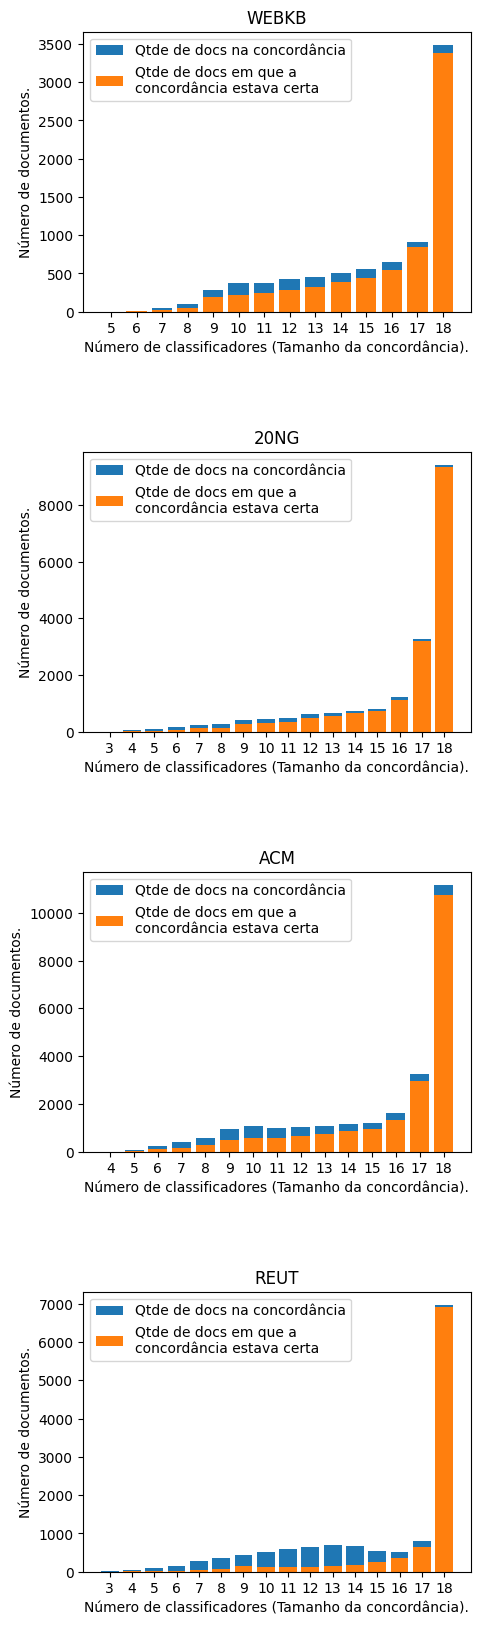

In [56]:
ag_by_hit = {}
plt.figure(figsize=(5, 20))
for pidx, dataset in enumerate(DATASETS):
    ag_by_hit[dataset] = {}
    df = pd_datasets[dataset]
    for conc_size in np.unique(df.conc_size.values):
        subdf = df[df.conc_size == conc_size]
        total = subdf.shape[0]
        hits = subdf[subdf.hit_counts == conc_size].shape[0]
        ag_by_hit[dataset][conc_size] = [total, hits, (hits / total) * 100]
    # Ploting.
    plt.subplot(len(DATASETS), 1, pidx + 1)
    keys = list(ag_by_hit[dataset].keys())
    keys.sort()
    y = [ ag_by_hit[dataset][key][0] for key in  keys ]
    x = np.arange(len(keys))
    plt.bar(x, y, label="Qtde de docs na concordância")
    y = [ ag_by_hit[dataset][key][1] for key in  keys ]
    plt.bar(x, y, label="Qtde de docs em que a\nconcordância estava certa")

    _ = plt.xticks(ticks=x, labels=keys)
    plt.ylabel("Número de documentos.")
    plt.xlabel("Número de classificadores (Tamanho da concordância).")
    plt.title(dataset.upper())
    plt.legend()

plt.subplots_adjust(hspace=0.5)

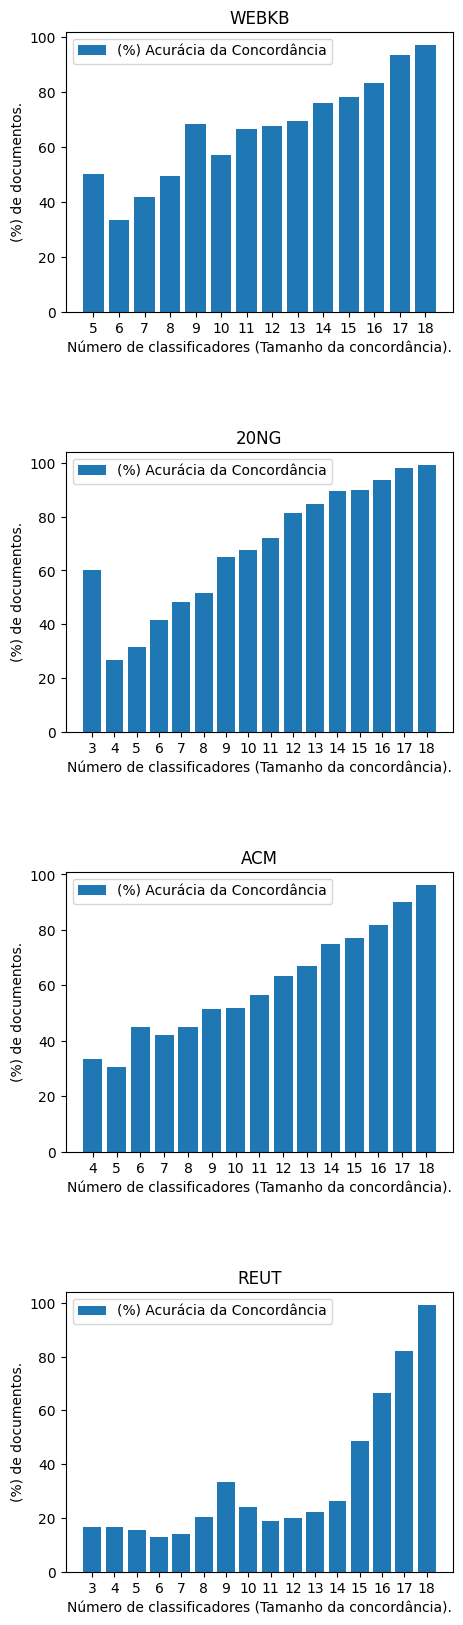

In [58]:
ag_by_hit = {}
plt.figure(figsize=(5, 20))
for pidx, dataset in enumerate(DATASETS):
    ag_by_hit[dataset] = {}
    df = pd_datasets[dataset]
    for conc_size in np.unique(df.conc_size.values):
        subdf = df[df.conc_size == conc_size]
        total = subdf.shape[0]
        hits = subdf[subdf.hit_counts == conc_size].shape[0]
        ag_by_hit[dataset][conc_size] = [total, hits, (hits / total) * 100]
    # Ploting.
    plt.subplot(len(DATASETS), 1, pidx + 1)
    keys = list(ag_by_hit[dataset].keys())
    keys.sort()
    y = [ ag_by_hit[dataset][key][2] for key in  keys ]
    x = np.arange(len(keys))
    plt.bar(x, y, label="(%) Acurácia da Concordância")

    _ = plt.xticks(ticks=x, labels=keys)
    plt.ylabel("(%) de documentos.")
    plt.xlabel("Número de classificadores (Tamanho da concordância).")
    plt.title(dataset.upper())
    plt.legend()

plt.subplots_adjust(hspace=0.5)

In [55]:
for dataset in ag_by_hit:
    keys = list(ag_by_hit[dataset].keys())
    keys.sort()
    print(dataset.upper())
    for tup in ag_by_hit[dataset]:
        c = ag_by_hit[dataset][tup]
        print(f"{tup};{c[0]};{c[1]};{c[2]}".replace('.', ','))
    print("*"*100)

WEBKB
5;2;1;50,0
6;12;4;33,33333333333333
7;48;20;41,66666666666667
8;103;51;49,51456310679612
9;285;195;68,42105263157895
10;376;214;56,91489361702128
11;377;250;66,3129973474801
12;423;286;67,61229314420804
13;459;319;69,49891067538127
14;506;384;75,8893280632411
15;557;435;78,09694793536805
16;654;543;83,02752293577981
17;912;850;93,2017543859649
18;3485;3380;96,987087517934
****************************************************************************************************
20NG
3;5;3;60,0
4;45;12;26,666666666666668
5;101;32;31,683168316831683
6;174;72;41,37931034482759
7;241;116;48,13278008298755
8;260;134;51,53846153846153
9;402;261;64,92537313432835
10;456;309;67,76315789473685
11;487;351;72,07392197125256
12;613;499;81,40293637846656
13;661;559;84,56883509833585
14;721;646;89,59778085991678
15;809;728;89,9876390605686
16;1208;1129;93,46026490066225
17;3254;3186;97,9102642901045
18;9409;9332;99,18163460516527
***********************************************************************